# How to embed using FORTE:

In [20]:
%matplotlib inline
from __future__ import division, print_function

import numpy as np 
import matplotlib.pyplot as plt

import FORTE.utils as utils
from FORTE.algorithms import FactoredGradientSGD

## 1) Lets make some synthetic data

In [25]:
n = 20                                       # Number of points
d = 2                                        # Dimension of embedding
pulls = int(30*n*d*np.log(n))                # number of triplets to collect
Xtrue = np.random.randn(n, d)/np.sqrt(d)     # n points within the d-dimensional sphere

# Generate #pulls triplets with logistic noise
triplets_train = utils.triplets(Xtrue, pulls, noise_func=utils.logistic_noise)
triplets_test = utils.triplets(Xtrue, pulls, noise_func=utils.logistic_noise)

## 2) Learn with the Factored Gradient algorithm

In [29]:
max_num_passes_SGD = 32   # number of SGD passes over the data
max_iter_GD = 100         # number of gradient iterations
max_norm = 1.0            # how large may the points be? We created points with expected norm 1
epsilon = 1e-5            # To what precision do we learn?

# Compute the embedding
Xhat = FactoredGradientSGD.computeEmbedding(n, d, triplets_train, 
                                            max_num_passes_SGD=max_num_passes_SGD,
                                            max_iter_GD=max_iter_GD,
                                            max_norm=max_norm,
                                            epsilon=epsilon,
                                            verbose=False)

## 3) Some statistics for how we did:

In [30]:
# Compute the error with respect to the true embedding for reference
err_true_train = utils.empirical_lossX(Xtrue, triplets_train)
err_true_test = utils.empirical_lossX(Xtrue, triplets_test)

# Compute the error of the learned embedding
err_learned_train = utils.empirical_lossX(Xhat, triplets_train)
err_learned_test = utils.empirical_lossX(Xhat, triplets_test)

# relative error of the learned embedding
_, Xpro, _ = utils.procrustes(Xtrue, Xhat)       # Procrustes transform to align points
relative_error = np.linalg.norm(Xpro - Xtrue, ord='fro')**2/np.linalg.norm(Xtrue, ord='fro')**2

# print results
print('Training error of learned embedding: {}, Bayes error on training set: {}'.format(err_learned_train, err_true_train))
print('Test error of learned embedding: {}, Bayes error on test set: {}'.format(err_learned_test, err_true_test))
print('Relative error: {}'.format(relative_error))

Training error of learned embedding: 0.203116304953, Bayes error on training set: 0.20673344463
Test error of learned embedding: 0.198107957707, Bayes error on test set: 0.195047301057
Relative error: 0.0114739968589


## 4) Plot results

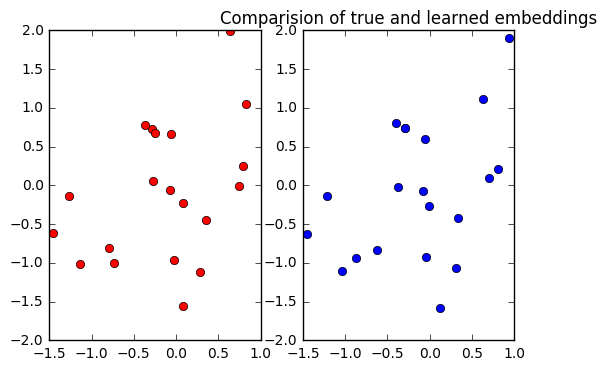

In [31]:
plt.figure(1)
plt.subplot(121)
plt.plot(*zip(*Xtrue), marker='o', color='r', ls='')
plt.subplot(122)
plt.plot(*zip(*Xpro), marker='o', color='b', ls='')
plt.title('Comparision of true and learned embeddings')
plt.show()